In [1]:
!sage --preparse Finite_Spaces/Homotopy.sage
!mv Finite_Spaces/Homotopy.sage.py Finite_Spaces/Homotopy.py
!sage --preparse Finite_Spaces/Deformations.sage
!mv Finite_Spaces/Deformations.sage.py Finite_Spaces/Deformations.py
!sage --preparse Finite_Spaces/Presentations.sage
!mv Finite_Spaces/Presentations.sage.py Finite_Spaces/Presentations.py
!sage --preparse Finite_Spaces/Morse.sage
!mv Finite_Spaces/Morse.sage.py Finite_Spaces/Morse.py
!sage --preparse Finite_Spaces/Colorings.sage
!mv Finite_Spaces/Colorings.sage.py Finite_Spaces/Colorings.py

from Finite_Spaces.General import *
from Finite_Spaces.Homotopy import *

In [2]:
P= Poset({1:[3,4],2:[3,4]})  
_sage_const_1 = homology(P)[0]
_sage_const_2 = homology(P)[1]


In [3]:
def relative_complement(X,K):  
    complement_elms = list(set(X.list())- set(K.list()))

    return X.subposet(complement_elms)

In [4]:
def intersection(X,Y):
    X_elms = X.list()
    Y_elms = Y.list()
    int_elms = list(set(X_elms) & set(Y_elms))
    return X.subposet(int_elms)

In [5]:
def is_D0(X):
    return (X.cardinality() == 1)

def is_S0(X):
    return (X.cardinality() == 2 and not X.has_top())

def is_D1(X): 
    for x in X.list():
        C_hat_x = C_hat(X, x)
        if ( not (is_D0(C_hat_x) or is_S0(C_hat_x)) ) : #chequeo que sea una variedad con borde de dimensión 1
            return False

    return is_contractible(X)
            
        
        

In [6]:
def is_S1(X): 
    if X.cardinality() == 0:
        return False
    
    for x in X.list():
        if ( not is_S0(C_hat(X, x))  ): #chequeo que una sea variedad sin borde de dimensión 1
            return False

    
    return (X.is_connected())

In [7]:
def is_a_sphere(X,n): #los True son reales, puede haber falsos False si n es mayor que 4.
    if (n == 0):
        return (is_S0(X))
    if n==1:
        return is_S1(X)
    
    if X.cardinality() == 0:
        return False
    
    for x in X.list():
        if (not is_a_sphere(C_hat(X, x),n-1) ):  #chequeo que sea variedad sin borde de dimensión n
            return False
        
    if(X.is_connected()): 
        if( fundamental_group(X).order() == 1): 
            if(n<=3):
                return True 
            
            for g in range(1, n-1):
                if (homology(X)[g] != _sage_const_1):
                    return False
            return homology(X)[n] == _sage_const_2
                
    
    return False

In [8]:
def is_a_disk(X,n): #los True son reales, puede haber falsos False si n es mayor que 2.
    if (n == 0):
        return (is_D0(X))
    if n==1:
        return is_D1(X)
    
    for x in X.list():
        C_hat_x = C_hat(X, x)
        if (not ( is_a_sphere(C_hat_x ,n-1) or is_a_disk(C_hat_x ,n-1) ) ):  #chequeo que sea variedad con borde de dimensión n
            return False
    if n==2:
        return weak_core(X).cardinality() == 1 #para dimensión 2, si es colapsable lo va a ser en cualquier orden de colapsos. No hace falta usar la función más pesada
        
    return is_collapsible(X)  

In [9]:
def is_manifold(X,n):
    if X.cardinality() == 0:
        return False
    
    for x in X.list():
        if (not is_a_sphere(C_hat(X, x),n-1) ):
            return False
    return True
        

In [10]:
def is_manifold_with_boundary(X,n): #los True son reales, puede haber falsos False si n es mayor que 3.
    if X.cardinality() == 0:
        return False
    
    for x in X.list():
        if (not (is_a_sphere(C_hat(X, x),n-1) or is_a_disk(C_hat(X, x),n-1)) ):
            return False
    return True

In [11]:
def restrictions_to_extend_to_S1(X,K):  
    if K.rank()>1: 
        return False

    for x in K.list():
        C_hatK=C_hat(K, x)
        C_hatX=C_hat(X, x)
                                                                     
        if (C_hatK.cardinality() > 2 or C_hatX.cardinality() < 2 or (C_hatX.is_chain() )): 
            return False
        
    if (is_manifold(K,2) and not X.is_connected()):
        return False
    
    return True  

In [12]:
def S1_in_X_aux(X,K): #Me da la lista de todos los subposets de X que contienen a K y que son ME de un S1.
    
    if (is_a_sphere(X,1)): 
        return [X]
    if (is_a_sphere(K,1)): 
        return [K]
    if (X.cardinality() == K.cardinality()): #Esto es "si X es igual a K". Podría poner X.is_isomorphic(K) pero es más costoso.
        return [] 
    
    if (not restrictions_to_extend_to_S1(X,K)):
        return []
    
    
    lista = []
    Y = X  
    
    for x in relative_complement(X,K):
        lista = lista + S1_in_X_aux(Y,  Y.subposet( K.list() + [x] ) ) 
        Y = remove_point(Y, x)
        
    return lista
        
    
    
    
    
    
    
    

In [13]:
def S1_in_X(X,K): #Me da la lista de todos los subposets de X que contienen a los elementos comunes entre X y K y que son ME de un S1.
    return S1_in_X_aux(X,intersection(X,K))
    

In [14]:
def K_is_boundary_aux(X,Y,K):   

    if (Y.rank()>2):
        return [False,X.subposet([])]      
    
    for x in K: 
        if (is_a_sphere(C_hat(Y,x),1)): #chequeo que los elementos de K no estén en interior de Y.
            return [False,X.subposet([])]
        
    if (is_a_disk(Y,2) ): 
        return [True, Y]
    
    if (X.cardinality() == Y.cardinality()): #Como Y está contenido en X, esto es que Y es X.
        return [False,X.subposet([])]
    
    
    M = relative_complement(X,Y).maximal_elements() #Cuando el nudo está en los primeros niveles, esto ayuda mucho.


    for x in M: 
        C_hat_x = C_hat(X,x)

        
        for possible_link in S1_in_X(C_hat_x,Y):

            not_eligible = relative_complement( C_hat_x ,possible_link )

            aux = K_is_boundary_aux(relative_complement( X , not_eligible), #Saco de X los elementos que no pueden estar.
                                X.subposet(Y.list() + possible_link.list() + [x]  ), #Le agrego a Y el elemento x y su link.
                                K)
            if (aux[0]):
                return aux

                  
        X = remove_point(X, x)

        
      
    return K_is_boundary_aux(X,Y,K)

        

In [15]:
def K_is_boundary_aux2(X,Y,K): 
       
    for x in K.maximal_elements(): #Esto tiene senido cuando el nudo está en los primeros dos niveles. 
        if (len(Y.upper_covers(x)) > 1 or 
            len(X.upper_covers(x)) == 0 ):
            return [False,X.subposet([])] 
    #Si pasé el for, los elementos de K no tienen como link a S1.
    
    if (Y.rank()>2):
        return [False,X.subposet([])]
        
    
        
    if ( is_a_disk(Y,2) ): 
        return [True, Y] 
    
    if (X.cardinality() == Y.cardinality()): #Como Y está contenido en X, esto es que Y es X.
        return [False,X.subposet([])]
    
    
    M = relative_complement(X,Y).maximal_elements() #Cuando el nudo está en los primeros niveles, esto ayuda mucho.
 

    for x in M: 
        C_hat_x = C_hat(X,x)
 
        
        for possible_link in S1_in_X(C_hat_x,Y ):
 
            not_eligible = relative_complement( C_hat_x ,possible_link )

            aux = K_is_boundary_aux2(relative_complement( X , not_eligible), #Saco de X los elementos que no pueden estar.
                                X.subposet(Y.list() + possible_link.list() + [x]  ), #Le agrego a Y el elemento x y su link.
                                K)
            if (aux[0]):
                return aux

                  
        X = remove_point(X, x)

        
      
    return K_is_boundary_aux2(X,Y,K)

In [16]:
def K_is_boundary(X,K,K_is_in_the_first_levels=False):
    if (not is_a_sphere(K,1)):
        return [False,X.subposet([])]
        
    
    if K_is_in_the_first_levels:
        return K_is_boundary_aux2(X,K,K)
    return K_is_boundary_aux(X,K,K)

In [17]:
def combinatorial_boundary(X,n): 
    boundary_elements = []
    if X.cardinality() == 0:
        return X.subposet(boundary_elements)
    
    for x in X.list():
        if ( is_a_disk(C_hat(X, x),n-1)):
            boundary_elements = boundary_elements + [x]
    return X.subposet(boundary_elements)

In [18]:
#EJEMPLO DE POSET SIN NUDOS NO TRIVIALES PERO CON UN TREBOL EN EL ORDER COMPLEX-------------------------------------------

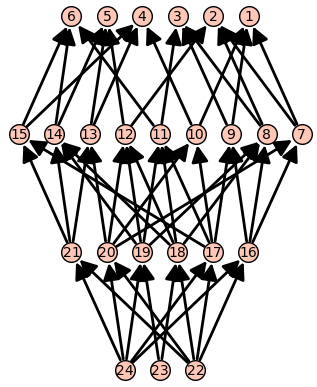

In [64]:
X= Poset({24:[16,17,19,20,21],23:[18,19],22:[16,17,18,20,21],
         16:[7,8,9],17:[9,10,11,15],18:[8,11,12,14],19:[8,11,12,14],20:[7,10,12,13],21:[13,14,15],
         7:[1,2],8:[2,3],9:[3,1],10:[1,4],11:[3,6],12:[2,5],13:[4,5],14:[5,6],15:[6,4],
         })
X.plot()

In [65]:
is_a_sphere(X,3)

True

In [21]:
#FIN EJEMPLO DE POSET SIN NUDOS NO TRIVIALES PERO CON UN TREBOL EN EL K-------------------------------------------------

In [22]:
#EJEMPLO DE POSET CON TRÉBOL--------------------------------------------------------------------------------------------

In [23]:
X= Poset({#--------------------1-CELDAS DEL PRISMA-------------------------
          7:[1,2],8:[3,4],9:[5,6],
          10:[1,5],11:[1,3],12:[3,5], 
          13:[2,6],14:[2,4],15:[4,6],
    

          #--------------------Cara(s) 1------------------------------------
          16:[1,4],17:[2,3], #1-cel
          
          18:[7,14,16],19:[16,8,11], #2-cel cara adentro
          20:[11,7,17],21:[17,14,8], #2-cel cara afuera
          
          22:[18,19,20,21], #3-cel
          
          #--------------------Cara(s) 2------------------------------------
          23:[3,6],24:[4,5], #1-cel
          
          25:[8,15,23],26:[23,9,12], #2-cel cara adentro
          27:[12,8,24],28:[24,15,9], #2-cel cara afuera
          
          29:[25,26,27,28], #3-cel
          
          #--------------------Cara(s) 3------------------------------------
          30:[5,2],31:[6,1], #1-cel
          
          32:[9,13,30],33:[30,7,10], #2-cel cara adentro
          34:[10,9,31],35:[31,13,7], #2-cel cara afuera
          
          36:[32,33,34,35], #3-cel
          
          #--------------------Tapas----------------------------------------
          37:[13,14,15], #Tapa de arriba
          38:[10,11,12], #Tapa de abajo
          
          #--------------------Ext a S3-------------------------------------
          39:[37,38,18,19,25,26,32,33], #Conifico las caras de adentro
          40:[37,38,20,21,27,28,34,35], #Conifico las caras de afuera

         })

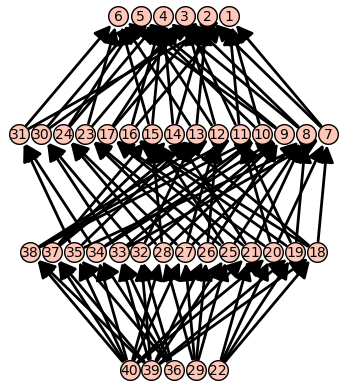

In [24]:
X.plot()

In [25]:
is_a_sphere(X,3)

True

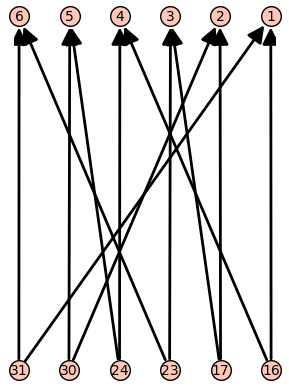

In [26]:
K = X.subposet([1,2,3,4,5,6,23,24,16,17,30,31])
K.plot()

In [27]:
S = relative_complement(X,K)
fundamental_group(S)

Finitely presented group < e0, e2 | e0*e2^-1*e0^-1*e2^-1*e0 >

In [28]:
#FIN EJEMPLO DE POSET CON TRÉBOL----------------------------------------------------------------------------------------

In [29]:
#NUDO TRÉBOL CON DOS ARISTAS--------------------------------------------------------------------------------------------

In [18]:
X= Poset({9:[1,2], #arista del nudo 
          #--------------------Brazo 1-------------------------------------
          10:[2,6],11:[3,6],12:[1,3],13:[1,4],14:[4,5],15:[5,2], #1-celdas del costado
          16:[3,4],17:[3,4],18:[5,6],19:[5,6], 
          20:[12,13,16],21:[12,13,17],22:[16,11,18,14],23:[17,11,19,14], #2-celdas exteriores
          24:[10,15,18],25:[10,15,19], #2-celdas exteriores
          26:[9,10,11,12],27:[9,13,14,15], #2-celdas interiores
          28:[26,27,20,22,24],29:[26,27,21,23,25], #3-celdas
          #--------------------Brazo 2-------------------------------------
          1009:[1,2], #arista del nudo 
          1010:[2,7],1011:[999,7],1012:[1,999], #1-celdas del costado
          1013:[1,1000],1014:[1000,8],1015:[8,2], #1-celdas del costado
          1016:[999,1000],1017:[999,1000],1018:[8,7],1019:[8,7], 
          
          41:[1012,1013,1016],42:[1012,1013,1017],43:[1016,1011,1018,1014], #2-celdas exteriores
          44:[1017,1011,1019,1014],45:[1010,1015,1018],46:[1010,1015,1019], #2-celdas exteriores
          
          47:[1009,1010,1011,1012],48:[1009,1013,1014,1015], #2-celdas interiores
          
          49:[47,48,41,43,45],52:[47,48,42,44,46], #3-celdas
          
          #--------------------Cara(s) 1------------------------------------
          53:[1,2],54:[2,999],55:[1000,5],56:[1,6], #1-cel
          
          57:[53,54,1012],58:[55,56,1013,19], #2-cel cara adentro
          59:[55,1016,54,15],60:[53,56,10], #2-cel cara afuera
          
          61:[57,41,58,59,25,60], #3-cel
          
          #--------------------Cara(s) 2------------------------------------
          62:[999,4],63:[3,7],64:[8,6], #1-cel
          
          65:[14,55,1017,62],66:[11,63,1019,64], #2-cel cara adentro
          67:[1011,63,16,62],68:[1014,55,18,64], #2-cel cara afuera
          
          69:[65,22,66,67,44,68], #3-cel
          
          #--------------------Cara(s) 3------------------------------------
          70:[4,2],71:[8,1], #1-cel
          
          72:[1010,63,17,70],73:[1015,53,71], #2-cel cara adentro
          74:[13,53,70],75:[12,63,1018,71], #2-cel cara afuera
          
          76:[72,45,73,74,21,75], #3-cel
          
          #--------------------Tapas----------------------------------------
          77:[70,54,62], #Tapa de arriba
          78:[71,56,64], #Tapa de abajo
          
          #--------------------Ext a S3-------------------------------------
          79:[77,78,59,24,60,67,43,68,74,20,75], #Conifico las caras de afuera
          80:[77,78,57,42,58,65,23,66,72,46,73], #Conifico las caras de afuera
          
         })

In [19]:
is_a_sphere(X,3)

True

In [20]:
K = X.subposet([1,2,9,1009])

In [21]:
S = relative_complement(X,K)
fundamental_group(S)

Finitely presented group < e1, e21 | e1*e21^-1*e1^-1*e21*e1^-1*e21^-1 >

In [41]:
#FIN NUDO TRÉBOL CON DOS ARISTAS----------------------------------------------------------------------------------

In [42]:
#NUDO TRIVIAL NO BORDE--------------------------------------------------------------------------------------------

In [18]:
X= Poset({'A':['AB','AH','AE','AF','AD'], 'B':['AB','BC','BE','BF'],'C':['BC','CD','CH','CG'],
          'D':['CD','DE','DH','DG','AD'],'E':['DE','EF','AE','BE','EH'],'F':['EF','FG','AF','BF'],
          'G':['FG','GH','CG','DG'],'H':['GH','AH','CH','DH','EH'],
         'AB':[1,2],'BC':['vi','ci'],'CD':[6,7],'DE':['V2','V4'],'EF':[3,4],'FG':['am','vi'],'GH':[8,9],
          'AH':['V1','V3'],'CH':[6,8,10,'ci'],'DH':[6,9,10,'V1','V4'],'CG':[7,8,10,'vi'],'DG':[7,9,10,'am'],
          'AE':[1,3,5,'V2','V3'],'BE':[1,4,5,'ci'],'AF':[2,3,5,'am'],'BF':[2,4,5,'vi'],'AD':['am','V1','V2'],
          'EH':['ci','V3','V4'],
         1:[1234,125],2:[1234,125],3:[1234,'S3'],4:[1234,'S3'],5:[125,'VI'],6:[6789,6710],7:[6789,6710],8:[6789,'S3'],
          9:[6789,'S3'],10:[6710,'VI'],'am':['VI','S3'],'vi':['VI','S3'],'ci':['VI','S3'],
          'V1':['VE','S3'],'V2':['VE','VI'],'V3':['VE','S3'],'V4':['VE','VI']})

In [19]:
print(is_a_sphere(X,3))

True


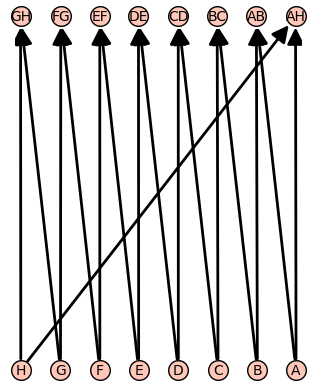

In [20]:
elemK = ['A','B','C','D','E','F','G','H','AB','BC','CD','DE','EF','FG','GH','AH']
K = X.subposet(elemK)
K.plot()

In [21]:
S = relative_complement(X,K)
fundamental_group(S)

Finitely presented group < e0 |  >

In [22]:
K_is_boundary(X,K,True)

[False, Finite poset containing 0 elements]

In [48]:
#FIN NUDO TRIVIAL NO BORDE-----------------------------------------------------------------------------------------